<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-proyecto-equipo-132/blob/main/Opcion2_ActS9_Reto1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Curso: Ciencia y analítica de datos (Gpo 10)**
###Tecnológico de Monterrey
###Prof titular: Jobish Vallikavungal Devassia 
###Prof tutor: Julio César Galindo López    

###Alumno: Luis Fernando Rios Piedra A00453954
###Alumno: David Eduardo Garcia Reyes A01086411

### **Semana 9**
###Reto 1
###Limpieza, Análisis, Visualización y KMeans

#Limpieza, análisis, visualización y agrupamiento.
##En esta base de datos encontraras:
###*Aguas subterraneas.*
###*Aguas superficiales.*
##Elige una base de datos, ya sea la de aguas superficiales o la de aguas subterraneas.
###*Limpieza de base de datos.*
###*Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):*
####*Identificando tendencias centrales promedio, media y mediana de los datos.*
####*Identificar medidas de dispersión, máximo, mínimo.*
####*Identificar medidas de posición no centrales , los cuartiles , outliers.*  
####*Identificar correlaciones.*
####*Preparar los datos.*
###*Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.*
###*Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.*

In [93]:
#Importar librearias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib as mpl
import seaborn as sns

In [7]:
#Leer base de datos proporcionada
path = "https://raw.githubusercontent.com/PosgradoMNA/actividades-del-proyecto-equipo-132/main/Aguas_Subterraneas_2020_V2.csv"
df = pd.read_csv(path, index_col=0)
df.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
CLAVE,,,,,,,,,,,,,,,,,,,,,
DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
DLAGU6516,POZO R013 CANADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1068 entries, DLAGU6 to OCRBR5109M1
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SITIO                 1068 non-null   object 
 1   ORGANISMO_DE_CUENCA   1068 non-null   object 
 2   ESTADO                1068 non-null   object 
 3   MUNICIPIO             1068 non-null   object 
 4   ACUIFERO              1068 non-null   object 
 5   SUBTIPO               1068 non-null   object 
 6   LONGITUD              1068 non-null   float64
 7   LATITUD               1068 non-null   float64
 8   PERIODO               1068 non-null   int64  
 9   ALC_mg/L              1064 non-null   float64
 10  CALIDAD_ALC           1064 non-null   object 
 11  CONDUCT_mS/cm         1062 non-null   float64
 12  CALIDAD_CONDUC        1062 non-null   object 
 13  SDT_mg/L              0 non-null      float64
 14  SDT_M_mg/L            1066 non-null   object 
 15  CALIDAD_SDT_ra

In [5]:
#Verificar si hay datos nulos o datos faltantes en el dataset
df.isnull().values.any()

True

In [6]:
#Verificar que columnas dentro del dataframe tienen datos nulos
df.isnull().any()

SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG              False
PB_TOT_mg/

In [8]:
#Se obtiene la suma de datos nulos en cada columna ordenados de menor a mayor
df.isnull().sum().sort_values()

SITIO                      0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L                0
CALIDAD_PB                 0
MN_TOT_mg/L                0
CALIDAD_MN                 0
FE_TOT_mg/L                0
CALIDAD_FE                 0
SEMAFORO                   0
CALIDAD_CD                 0
CUMPLE_CON_ALC             0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_COND            0
CUMPLE_CON_MN              0
CD_TOT_mg/L                0
AS_TOT_mg/L                0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD      

In [13]:
#Limpieza de datos

In [14]:
#Copiar dataset
ndf=df

In [15]:
#Calcular la media para la columna "CONDUCT_mS/cm"
AVG_CONDUCT_mScm = df["CONDUCT_mS/cm"].astype("float").mean(axis=0)
print("CONDUCT_mS/cm:", AVG_CONDUCT_mScm)

CONDUCT_mS/cm: 1138.9530131826743


In [16]:
#Reemplazar los valores Nan de la columna "CONDUCT_mS/cm" con el valor de la media obtenido
ndf["CONDUCT_mS/cm"].replace(np.nan, AVG_CONDUCT_mScm, inplace=True)
ndf.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
CLAVE,,,,,,,,,,,,,,,,,,,,,
DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
DLAGU6516,POZO R013 CANADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [17]:
ndf['CALIDAD_CONDUC'].value_counts()

Permisible para riego    460
Buena para riego         434
Dudosa para riego         72
Indeseable para riego     51
Excelente para riego      45
Name: CALIDAD_CONDUC, dtype: int64

In [18]:
#Reemplazar valores NaN de la columna "CALIDAD_CONDUC" con el valor obtenido
ndf["CALIDAD_CONDUC"].replace(np.nan, "Permisible para riego", inplace=True)
ndf.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
CLAVE,,,,,,,,,,,,,,,,,,,,,
DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
DLAGU6516,POZO R013 CANADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [21]:
#Calcular la media para la columna "ALC_mg/L"
AVG_ALC_mgL = ndf["ALC_mg/L"].astype("float").mean(axis=0)
print("ALC_mg/L:", AVG_ALC_mgL)

ALC_mg/L: 235.63375939849624


In [22]:
#Reemplazar los valores Nan de la columna "ALC_mg/L" con el valor de la media obtenido
ndf["ALC_mg/L"].replace(np.nan, AVG_ALC_mgL, inplace=True)
ndf.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
CLAVE,,,,,,,,,,,,,,,,,,,,,
DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
DLAGU6516,POZO R013 CANADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [20]:
ndf['CALIDAD_ALC'].value_counts()

Alta                    794
Media                   187
Indeseable como FAAP     59
Baja                     24
Name: CALIDAD_ALC, dtype: int64

In [23]:
#Reemplazar valores NaN de la columna "CALIDAD_CONDUC" con el valor obtenido
ndf["CALIDAD_ALC"].replace(np.nan, "Alta", inplace=True)
ndf.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
CLAVE,,,,,,,,,,,,,,,,,,,,,
DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
DLAGU6516,POZO R013 CANADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [33]:
#Eliminar columna "SDT_mg/L" ya que no cuenta con datos
ndf.drop(['SDT_mg/L'], axis=1, inplace=True)
ndf.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,POZO R013 CANADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [38]:
#Eliminar filas de las columnas "DUR_mg/L", "CALIDAD_DUR", "N_NO3_mg/L", "SDT_M_mg/L", "CALIDAD_SDT_ra", "CALIDAD_SDT_salin" con valor NaN
ndf.dropna(subset=["DUR_mg/L", "CALIDAD_DUR", "N_NO3_mg/L", "SDT_M_mg/L", "CALIDAD_SDT_ra", "CALIDAD_SDT_salin"], axis=0, inplace=True)
ndf.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,POZO R013 CANADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [67]:
#Se reemplazan los valores que incluyen "<" con el 60% del valor 
ndf['SDT_M_mg/L'].replace('<25', (25*.6), inplace=True)

In [69]:
#Se reemplazan los valores que incluyen "<" con el 60% del valor 
ndf['FLUORUROS_mg/L'].replace('<0.2', (0.2*.6), inplace=True)

In [70]:
#Se reemplazan los valores que incluyen "<" con el 60% del valor 
ndf['DUR_mg/L'].replace('<20', (20*.6), inplace=True)

In [72]:
#Se reemplazan los valores que incluyen "<" con el 60% del valor 
ndf['COLI_FEC_NMP/100_mL'].replace('<1.1', (1.1*.6), inplace=True)

In [73]:
#Se reemplazan los valores que incluyen "<" con el 60% del valor 
ndf['N_NO3_mg/L'].replace('<0.02', (0.02*.6), inplace=True)

In [74]:
#Se reemplazan los valores que incluyen "<" con el 60% del valor 
ndf['AS_TOT_mg/L'].replace('<0.01', (0.01*.6), inplace=True)

In [75]:
#Se reemplazan los valores que incluyen "<" con el 60% del valor 
ndf['CD_TOT_mg/L'].replace('<0.003', (0.003*.6), inplace=True)

In [76]:
#Se reemplazan los valores que incluyen "<" con el 60% del valor 
ndf['CR_TOT_mg/L'].replace('<0.005', (0.005*.6), inplace=True)

In [77]:
#Se reemplazan los valores que incluyen "<" con el 60% del valor 
ndf['HG_TOT_mg/L'].replace('<0.0005', (0.0005*.6), inplace=True)

In [78]:
#Se reemplazan los valores que incluyen "<" con el 60% del valor 
ndf['PB_TOT_mg/L'].replace('<0.005', (0.005*.6), inplace=True)

In [79]:
#Se reemplazan los valores que incluyen "<" con el 60% del valor 
ndf['MN_TOT_mg/L'].replace('<0.0015', (0.0015*.6), inplace=True)

In [80]:
#Se reemplazan los valores que incluyen "<" con el 60% del valor 
ndf['FE_TOT_mg/L'].replace('<0.025', (0.025*.6), inplace=True)

In [81]:
#Se obtiene la suma de datos nulos en cada columna ordenados de menor a mayor
ndf.isnull().sum().sort_values()

SITIO                     0
CALIDAD_CR                0
HG_TOT_mg/L               0
CALIDAD_HG                0
PB_TOT_mg/L               0
CALIDAD_PB                0
MN_TOT_mg/L               0
CALIDAD_MN                0
FE_TOT_mg/L               0
CALIDAD_FE                0
SEMAFORO                  0
CUMPLE_CON_ALC            0
CUMPLE_CON_COND           0
CUMPLE_CON_SDT_ra         0
CUMPLE_CON_SDT_salin      0
CUMPLE_CON_FLUO           0
CUMPLE_CON_DUR            0
CUMPLE_CON_CF             0
CUMPLE_CON_NO3            0
CUMPLE_CON_AS             0
CUMPLE_CON_CD             0
CUMPLE_CON_CR             0
CUMPLE_CON_HG             0
CUMPLE_CON_PB             0
CR_TOT_mg/L               0
CUMPLE_CON_MN             0
CALIDAD_CD                0
CALIDAD_AS                0
ORGANISMO_DE_CUENCA       0
ESTADO                    0
MUNICIPIO                 0
ACUIFERO                  0
SUBTIPO                   0
LONGITUD                  0
LATITUD                   0
PERIODO             

In [82]:
#Identificar los data types de cada columna
ndf.dtypes

SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_CR               object
HG_TOT_mg/L              object
CALIDAD_

In [83]:
#Se identifican columnas con datos tipo object cuando deberian ser int o float, se procede a corregir los data types
ndf[['SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L']] = ndf[['SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L']] .astype("float")
ndf[['CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']] = ndf[['CD_TOT_mg/L','CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']] .astype("float")

In [84]:
#Identificar los data types de cada columna
ndf.dtypes

SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_M_mg/L              float64
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L          float64
CALIDAD_FLUO             object
DUR_mg/L                float64
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL     float64
CALIDAD_COLI_FEC         object
N_NO3_mg/L              float64
CALIDAD_N_NO3            object
AS_TOT_mg/L             float64
CALIDAD_AS               object
CD_TOT_mg/L             float64
CALIDAD_CD               object
CR_TOT_mg/L             float64
CALIDAD_CR               object
HG_TOT_mg/L             float64
CALIDAD_

In [111]:
#Se quitan las variables categoricas para poder obtener la correlacion
cdf = ndf.drop(columns=['SITIO','ORGANISMO_DE_CUENCA','ESTADO',"MUNICIPIO","ACUIFERO","SUBTIPO","CALIDAD_ALC","CALIDAD_CONDUC","CALIDAD_SDT_ra","CALIDAD_SDT_salin", "CALIDAD_FLUO", 
                        "CALIDAD_DUR", "CALIDAD_COLI_FEC","CALIDAD_N_NO3","CALIDAD_AS","CALIDAD_CD", "CALIDAD_CR", "CALIDAD_HG", "CALIDAD_PB", "CALIDAD_MN", "CALIDAD_FE", "SEMAFORO", 
                        "CONTAMINANTES", "CUMPLE_CON_ALC", "CUMPLE_CON_COND","CUMPLE_CON_SDT_ra","CUMPLE_CON_SDT_salin","CUMPLE_CON_FLUO", "CUMPLE_CON_DUR", "CUMPLE_CON_CF", "CUMPLE_CON_NO3", 
                        "CUMPLE_CON_AS", "CUMPLE_CON_CD", "CUMPLE_CON_CR","CUMPLE_CON_HG","CUMPLE_CON_PB","CUMPLE_CON_MN", "CUMPLE_CON_FE"])
cdf.head()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,-102.02210,22.20887,2020,229.990,940.0,603.6,0.9766,213.7320,0.66,4.184656,0.0161,0.0018,0.003,0.0003,0.003,0.0009,0.0891
1,-102.20075,21.99958,2020,231.990,608.0,445.4,0.9298,185.0514,0.66,5.750110,0.0134,0.0018,0.003,0.0003,0.003,0.0009,0.0150
2,-102.28801,22.36685,2020,204.920,532.0,342.0,1.8045,120.7190,0.66,1.449803,0.0370,0.0018,0.003,0.0003,0.003,0.0009,0.0150
3,-102.29449,22.18435,2020,327.000,686.0,478.6,1.1229,199.8790,0.66,1.258597,0.0154,0.0018,0.005,0.0003,0.003,0.0009,0.0150
4,-110.24480,23.45138,2020,309.885,1841.0,1179.0,0.2343,476.9872,291.00,15.672251,0.0060,0.0018,0.003,0.0003,0.003,0.0009,0.0150


In [113]:
#Usar funcion describe
cdf.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
LONGITUD,1064.0,-101.888948,6.713487,-116.66425,-105.394575,-102.173075,-98.974716,-86.864120
LATITUD,1064.0,23.169131,3.888265,14.56115,20.221577,22.617190,25.510285,32.677713
PERIODO,1064.0,2020.000000,0.000000,2020.00000,2020.000000,2020.000000,2020.000000,2020.000000
ALC_mg/L,1064.0,235.908849,116.765811,26.64000,164.203750,216.450000,292.710000,1650.000000
CONDUCT_mS/cm,1064.0,1140.533664,1243.926518,50.40000,506.000000,824.000000,1322.250000,18577.000000
SDT_M_mg/L,1064.0,897.070555,2754.022393,15.00000,337.700000,551.400000,917.000000,82170.000000
FLUORUROS_mg/L,1064.0,1.066429,1.933017,0.12000,0.268900,0.505450,1.140800,34.803300
DUR_mg/L,1064.0,348.173034,360.200110,12.00000,121.274100,245.662350,454.139700,3810.692200
COLI_FEC_NMP/100_mL,1064.0,356.363816,2056.274210,0.66000,0.660000,0.660000,11.000000,24196.000000
N_NO3_mg/L,1064.0,4.311878,8.348089,0.01200,0.646229,2.080766,5.200047,121.007813


In [114]:
#Calcular correlacion entre variables int y float
cdf.corr()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
LONGITUD,1.000000,-0.760984,NaN,0.166584,0.060720,-0.013936,-0.127097,0.087994,-0.084525,-0.107251,-0.085812,0.043605,0.058798,0.044048,0.003369,-0.036210,0.022141
LATITUD,-0.760984,1.000000,NaN,-0.080080,0.053822,0.059824,0.134625,0.085815,0.062972,0.150201,0.099186,-0.052938,-0.059236,-0.118554,-0.058122,-0.036678,-0.042008
PERIODO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALC_mg/L,0.166584,-0.080080,NaN,1.000000,0.219080,0.079205,0.068107,0.241974,-0.016791,0.000056,0.072470,0.031768,-0.014346,0.072113,0.018456,0.129709,0.043551
CONDUCT_mS/cm,0.060720,0.053822,NaN,0.219080,1.000000,0.286340,-0.025129,0.691918,0.017635,0.219241,-0.006105,0.028237,0.004281,0.055243,0.025099,0.095878,0.083353
SDT_M_mg/L,-0.013936,0.059824,NaN,0.079205,0.286340,1.000000,-0.013464,0.347049,-0.001186,0.101692,-0.011496,0.010503,-0.000334,0.025385,0.010082,0.018929,0.020156
FLUORUROS_mg/L,-0.127097,0.134625,NaN,0.068107,-0.025129,-0.013464,1.000000,-0.151488,0.002988,-0.018854,0.449826,-0.016778,-0.004971,-0.030159,-0.037332,-0.049736,-0.009991
DUR_mg/L,0.087994,0.085815,NaN,0.241974,0.691918,0.347049,-0.151488,1.000000,0.031637,0.301488,-0.113372,0.024451,0.007192,0.065782,-0.015869,0.083826,0.060000
COLI_FEC_NMP/100_mL,-0.084525,0.062972,NaN,-0.016791,0.017635,-0.001186,0.002988,0.031637,1.000000,-0.000802,0.036103,-0.000218,-0.009050,-0.009868,0.020359,-0.005362,0.003093
N_NO3_mg/L,-0.107251,0.150201,NaN,0.000056,0.219241,0.101692,-0.018854,0.301488,-0.000802,1.000000,-0.005036,-0.009773,-0.015160,0.008281,-0.018011,-0.036778,0.013345


In [115]:
# Se procede a realizar la normalización de los datos
pcs = PCA()
pcs.fit(preprocessing.scale(cdf))

PCA()

In [116]:
# Creación de dataframe con resumen de cálculos de PCA
summary={'Standard deviation':np.sqrt(pcs.explained_variance_),
         'Proportion of variance':pcs.explained_variance_ratio_,
         'Cumulative proportion':np.cumsum(pcs.explained_variance_ratio_)
}
summary
pcsSummary=pd.DataFrame(summary).transpose()
pcsSummary=pcsSummary.round(2)
pcsSummary

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Standard deviation,1.61,1.44,1.39,1.19,1.01,1.00,1.00,0.98,0.95,0.93,0.83,0.74,0.61,0.54,0.47,0.34,0.0
Proportion of variance,0.16,0.13,0.12,0.09,0.06,0.06,0.06,0.06,0.06,0.05,0.04,0.03,0.02,0.02,0.01,0.01,0.0
Cumulative proportion,0.16,0.29,0.41,0.50,0.57,0.63,0.69,0.75,0.81,0.86,0.90,0.94,0.96,0.98,0.99,1.00,1.0


In [117]:
#Operación para renombrar columnas como componentes PC**
pcsSummary.columns=['PC{}'.format(i) for i in range(1,len(pcsSummary.columns)+1) ]
pcsSummary

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Standard deviation,1.61,1.44,1.39,1.19,1.01,1.00,1.00,0.98,0.95,0.93,0.83,0.74,0.61,0.54,0.47,0.34,0.0
Proportion of variance,0.16,0.13,0.12,0.09,0.06,0.06,0.06,0.06,0.06,0.05,0.04,0.03,0.02,0.02,0.01,0.01,0.0
Cumulative proportion,0.16,0.29,0.41,0.50,0.57,0.63,0.69,0.75,0.81,0.86,0.90,0.94,0.96,0.98,0.99,1.00,1.0


In [118]:
# Con la informacion de la grafica e informacion de desviacion estandar, proporcion de la varianza y proporcion acumulada se obtiene que la canditad optima de componentes es hasta PC11
# ya que representa el 90% de la variabilidad
pcsSummary.iloc[2,10]

0.9

In [124]:
# Se obtiene la matriz transpuesta de los componentes con las variables/columnas
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary.columns,index=cdf.iloc[:, 0:].columns).abs()
pcsComponents_df.iloc[:,:11]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
LONGITUD,0.102099,8.855546e-02,6.082430e-01,2.430987e-01,4.502288e-02,1.938335e-02,3.164426e-02,1.199659e-01,1.713353e-01,9.558833e-02,2.822316e-02
LATITUD,0.099463,2.127315e-01,5.826546e-01,1.887371e-01,1.689098e-02,3.322603e-02,1.797136e-02,7.940135e-02,2.039941e-01,1.513028e-01,2.828126e-02
PERIODO,0.000000,4.163336e-17,4.163336e-17,1.110223e-16,1.249001e-16,1.249001e-16,4.163336e-17,5.551115e-17,2.220446e-16,8.326673e-17,3.469447e-17
ALC_mg/L,0.165834,1.666910e-01,1.236247e-01,3.829264e-01,1.166371e-01,1.256102e-01,1.191598e-01,3.572057e-02,3.756083e-01,5.909001e-01,4.785612e-01
CONDUCT_mS/cm,0.240218,5.023731e-01,5.850304e-02,1.144664e-01,2.967015e-02,3.051306e-02,4.641671e-03,6.848853e-03,3.526418e-03,3.209799e-02,5.094256e-01
SDT_M_mg/L,0.126872,3.507766e-01,5.511461e-03,4.500720e-02,6.331213e-03,6.339049e-02,5.023119e-03,9.379036e-02,2.972650e-01,7.246676e-01,4.721500e-01
FLUORUROS_mg/L,0.079609,5.462810e-02,2.993535e-01,5.931501e-01,3.827709e-02,5.075371e-02,5.328493e-03,5.452592e-02,1.003764e-01,1.077248e-01,5.165320e-02
DUR_mg/L,0.247805,5.443052e-01,9.543401e-02,6.850146e-03,1.507312e-02,1.229572e-02,1.575009e-02,5.636584e-02,4.679726e-03,4.994048e-02,2.517268e-01
COLI_FEC_NMP/100_mL,0.008395,4.048666e-02,1.025767e-01,3.334788e-02,6.153044e-01,9.434717e-02,3.883157e-01,6.496395e-01,1.065058e-01,3.679613e-02,9.777144e-02
N_NO3_mg/L,0.068077,3.266560e-01,1.121405e-01,9.864162e-02,1.903921e-01,4.709901e-02,2.822318e-02,4.000064e-02,7.668160e-01,1.581460e-01,4.373401e-01


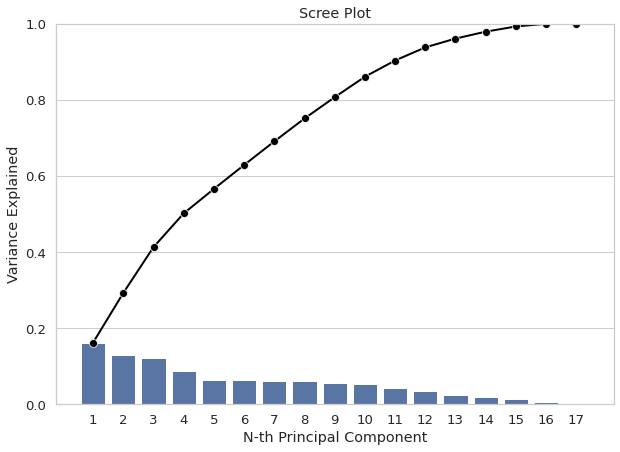

In [125]:
# Se realiza la Scree Plot
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [128]:
# En una variable x se almacenan los nombres de las columnas para poder graficarlas con scatterplot
x = pcsComponents_df.index
x = x.to_list()
x

['LONGITUD',
 'LATITUD',
 'PERIODO',
 'ALC_mg/L',
 'CONDUCT_mS/cm',
 'SDT_M_mg/L',
 'FLUORUROS_mg/L',
 'DUR_mg/L',
 'COLI_FEC_NMP/100_mL',
 'N_NO3_mg/L',
 'AS_TOT_mg/L',
 'CD_TOT_mg/L',
 'CR_TOT_mg/L',
 'HG_TOT_mg/L',
 'PB_TOT_mg/L',
 'MN_TOT_mg/L',
 'FE_TOT_mg/L']

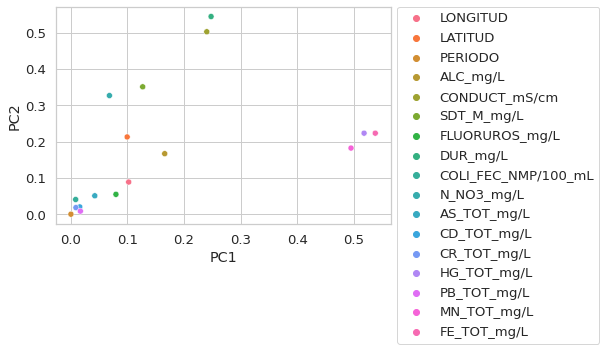

In [129]:
# Se obtiene la grafica scatterplot de los 2 primeros componentes PC1 y PC2
sns.scatterplot(data=pcsComponents_df, x="PC1", y="PC2", hue=pcsComponents_df.index)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

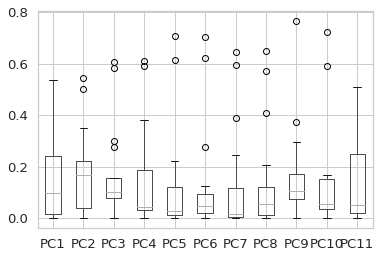

In [130]:
#Box plot
from seaborn.categorical import boxplot
boxplot=pcsComponents_df.iloc[:,:11]
boxplot.boxplot()

In [133]:
#KMeans

In [137]:
#Instalar librerias requeridas
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 589 kB/s 
     |████████████████████████████████| 1.0 MB 44.4 MB/s 
     |████████████████████████████████| 1.7 MB 43.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 52.6 MB/s 
     |████████████████████████████████| 6.3 MB 35.4 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=9049bef062b2c3416e286971fce5a546fd58195ebd107509ba21a3b3b50396bf
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=1d12089a774ce38fd6d5507577155eb79edc30a29eadc4fa847ac66c940d2eb6
  Stored in directory: /root/.

In [146]:
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
from shapely.geometry import Point
import geopandas as gpd

In [166]:
latlong = ndf[["LATITUD","LONGITUD"]]

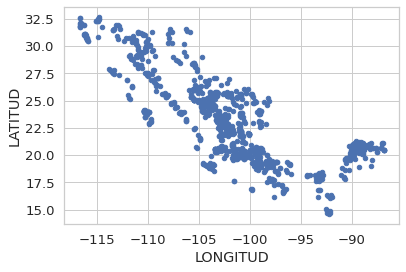

In [167]:
#Extrae los datos interesantes
latlong.plot.scatter("LONGITUD","LATITUD")

In [168]:
latlong.describe()

,LATITUD,LONGITUD
count,1064.000000,1064.000000
mean,23.169131,-101.888948
std,3.888265,6.713487
min,14.561150,-116.664250
25%,20.221577,-105.394575
50%,22.617190,-102.173075
75%,25.510285,-98.974716
max,32.677713,-86.864120


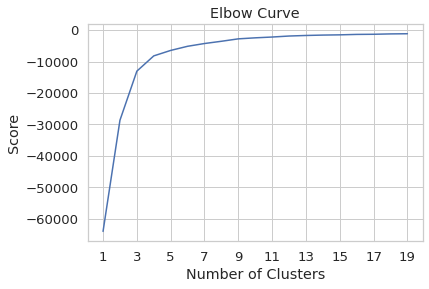

In [169]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong).score(latlong) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(min(Nc), max(Nc)+1, 2.0))
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [170]:
kmeans = KMeans(n_clusters = 5, init ='k-means++') 
kmeans.fit(latlong[latlong.columns[0:2]])
labels = kmeans.labels_
labels

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

In [171]:
X = ndf[["LONGITUD","LATITUD"]]
kmeans = KMeans(n_clusters=5).fit(X) 
centroids = kmeans.cluster_centers_ 
labels = kmeans.predict(X) 
C = kmeans.cluster_centers_
C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) 
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)
gdf_C = gpd.GeoDataFrame(C_DF, geometry="Coordinates") 
gdf_C

,0,1,Coordinates
0,-107.791999,25.853527,POINT (-107.79200 25.85353)
1,-90.092716,19.650263,POINT (-90.09272 19.65026)
2,-102.568836,24.199865,POINT (-102.56884 24.19986)
3,-112.587985,30.316491,POINT (-112.58799 30.31649)
4,-100.122233,19.834383,POINT (-100.12223 19.83438)


In [172]:
ndf["Coordinates"] = list(zip(cdf.LONGITUD, cdf.LATITUD))
ndf["Coordinates"] = ndf["Coordinates"].apply(Point)
ndf.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.0221 22.20887)
1,POZO R013 CANADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
2,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
3,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
4,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.2448 23.45138)


In [173]:
gdf = gpd.GeoDataFrame(ndf, geometry="Coordinates")
gdf.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.02210 22.20887)
1,POZO R013 CANADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
2,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
3,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
4,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.24480 23.45138)


In [182]:
#Se reemplazan los valores de los colores del semaforo a ingles
gdf['SEMAFORO'].replace('Verde', 'Green', inplace=True)
gdf['SEMAFORO'].replace('Rojo', 'Red', inplace=True)
gdf['SEMAFORO'].replace('Amarillo', 'Yellow', inplace=True)
gdf.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.02210 22.20887)
1,POZO R013 CANADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
2,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
3,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
4,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.24480 23.45138)


In [183]:
#Mapa
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


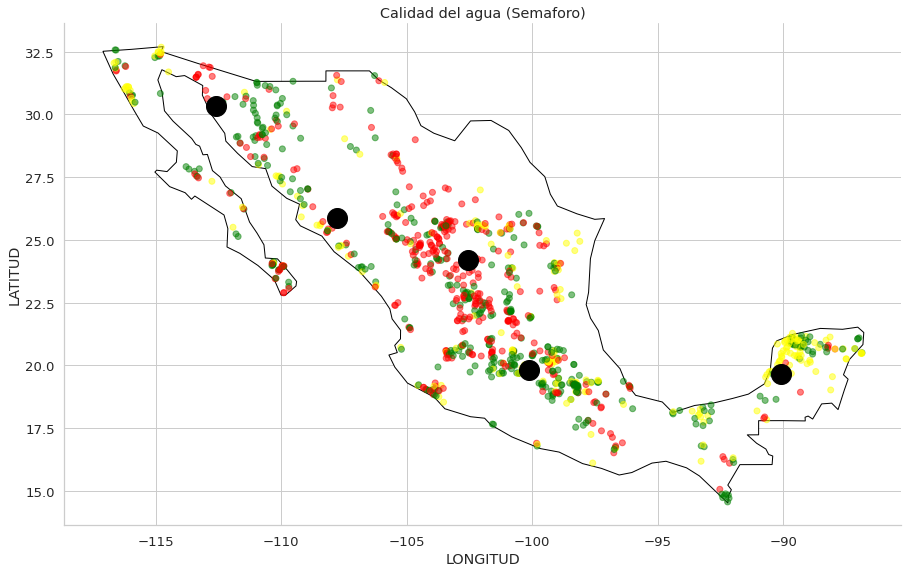

In [191]:
fig, gax = plt.subplots(figsize=(15,10))
#mapa
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') 
#grafica de datos iniciales
gdf.plot(ax=gax, color=gdf["SEMAFORO"], alpha = 0.5) 
#grafica de datos actuales
gdf_C.plot(ax=gax, color='black', alpha = 1, markersize = 400) 

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Calidad del agua (Semaforo)')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

##Como se muestra en el mapa y utilizando el semaforo si se puede apreciar una acumulacion en el area de Durango y Zacatecas de una mala calidad del agua